# Graph의 State 업데이트 하기 (대화 목록 관리)

## Message 내역을 포함한 State 정의, 누적하여 활용

- `HumanMessage` : 사용자(사람)의 메시지
- `AIMessage` : AI(LLM)의 메시지
- `AnyMessage` : HumanMessage, AIMessage를 포함하는 메시지

In [1]:
from typing_extensions import TypedDict
from langchain_core.messages import (
    HumanMessage,
    AIMessage,
    AnyMessage
)
from typing import Annotated
from langgraph.graph.message import add_messages

class InputState(TypedDict):
    query: str

class OutputState(TypedDict):
    answer: str

class GraphState(InputState, OutputState):
    messages: Annotated[list[AnyMessage], add_messages]

In [8]:
# Define Nodes
def chatbot_node(state: InputState):
    query = state['query']
    user_message = HumanMessage(content=query)

    answer = "안녕하세요! 무엇을 도와드릴까요?"
    ai_message = AIMessage(content=answer)

    return {
        'messages' : [user_message, ai_message],
        'answer' : answer
    }

def show_messages_node(state: GraphState):
    for message in state['messages']:
        message.pretty_print()
    return state

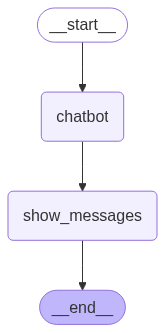

In [9]:
from langgraph.graph import StateGraph, START, END

# Define Graph Builder
workflow = StateGraph(
    GraphState,
    input=InputState,
    output=OutputState
)

# Add nodes
workflow.add_node("chatbot", chatbot_node)
workflow.add_node("show_messages", show_messages_node)

# Add edges
workflow.add_edge(START, "chatbot")
workflow.add_edge("chatbot", "show_messages")
workflow.add_edge("show_messages", END)

# Compile Graph
app = workflow.compile()

app

In [10]:
app.invoke({'query' : '안녕'})

================================ Human Message =================================

안녕
================================== Ai Message ==================================

안녕하세요! 무엇을 도와드릴까요?


{'answer': '안녕하세요! 무엇을 도와드릴까요?'}